#Stock Price Prediction Using LSTM
BTC - USD


In [2]:
# pip install --upgrade tensorflow


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import keras
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import Dropout
import math as mt
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from matplotlib import figure

In [5]:
# Baca file CSV
data = pd.read_csv('/content/drive/MyDrive/Portofolio/StockPricePredictionUsingLSTM/BTC-USD.csv')


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       366 non-null    object 
 1   Open       365 non-null    float64
 2   High       365 non-null    float64
 3   Low        365 non-null    float64
 4   Close      365 non-null    float64
 5   Adj Close  365 non-null    float64
 6   Volume     365 non-null    float64
dtypes: float64(6), object(1)
memory usage: 20.1+ KB


In [7]:
data['Date']=pd.to_datetime(data['Date'])
data = data.set_index('Date')
data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-01-13,18868.906250,19964.322266,18753.164063,19909.574219,19909.574219,2.922503e+10
2023-01-14,19910.537109,21075.142578,19907.828125,20976.298828,20976.298828,3.896778e+10
2023-01-15,20977.484375,20993.748047,20606.986328,20880.798828,20880.798828,1.929841e+10
2023-01-16,20882.224609,21360.875000,20715.746094,21169.632813,21169.632813,2.679249e+10
2023-01-17,21175.833984,21438.660156,20978.533203,21161.519531,21161.519531,2.499998e+10


In [8]:
data.isnull().sum()

Open         1
High         1
Low          1
Close        1
Adj Close    1
Volume       1
dtype: int64

In [9]:
#menggantikan data yang kosong dengan rata rata
data.fillna(data.mean(), inplace=True)

In [10]:
data.isnull().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [11]:
data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,366.000000,366.000000,366.000000,366.000000,366.000000,3.660000e+02
mean,29700.369451,30210.765261,29259.276686,29766.487270,29766.487270,1.890059e+10
std,6134.878031,6277.456436,5977.770805,6146.091714,6146.091714,9.177551e+09
min,18868.906250,19964.322266,18753.164063,19909.574219,19909.574219,5.331173e+09
25%,26169.932618,26518.798828,25812.128418,26196.500488,26196.500488,1.231499e+10
50%,28035.614258,28485.041015,27442.346679,28041.408203,28041.408203,1.643088e+10
75%,30488.193360,31006.492187,30234.696778,30507.049317,30507.049317,2.390341e+10
max,46987.640625,48969.371094,45678.644531,46970.503906,46970.503906,5.462223e+10


array([[<Axes: title={'center': 'Open'}>,
        <Axes: title={'center': 'High'}>],
       [<Axes: title={'center': 'Low'}>,
        <Axes: title={'center': 'Close'}>],
       [<Axes: title={'center': 'Adj Close'}>,
        <Axes: title={'center': 'Volume'}>]], dtype=object)

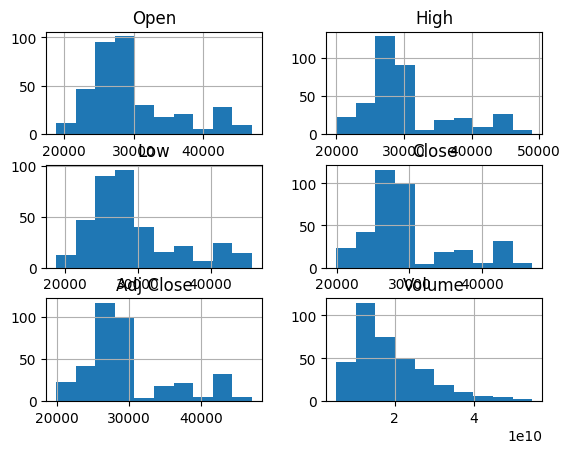

In [12]:
data.hist()

In [24]:
data = data[['Adj Close']]
data.head()

,Adj Close
Date,
2023-01-13,19909.574219
2023-01-14,20976.298828
2023-01-15,20880.798828
2023-01-16,21169.632813
2023-01-17,21161.519531


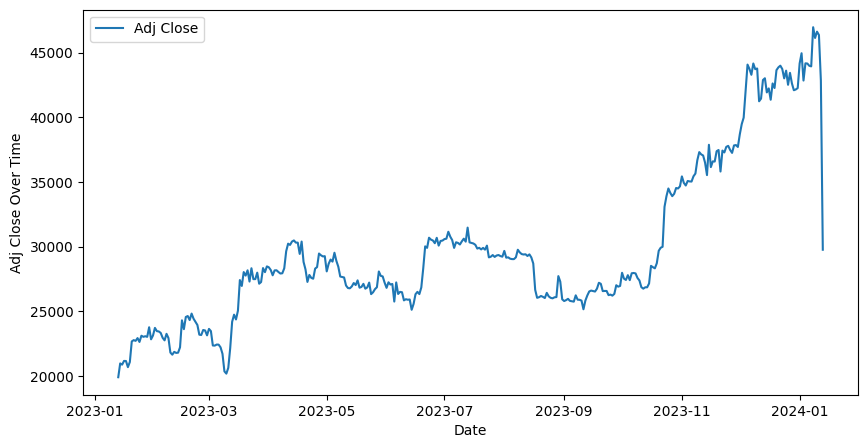

In [26]:
plt.figure(figsize=[10,5])
plt.plot(data.index,data['Adj Close'],label='Adj Close')
plt.xlabel('Date')
plt.ylabel('Adj Close Over Time')
plt.legend()
plt.show()

In [27]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data)

In [28]:
from sklearn.model_selection import train_test_split
train_size = int(len(data_scaled)*0.8)
train_data, test_data = data_scaled[:train_size],data_scaled[train_size:]

In [29]:
def create_sequences(data, sequence_length):
    x, y = [], []
    for i in range(len(data) - sequence_length):
        x.append(data[i:(i + sequence_length), 0])
        y.append(data[i + sequence_length, 0])
    return np.array(x), np.array(y)

In [30]:
sequence_length = 10
x_train, y_train = create_sequences(train_data, sequence_length)
x_test, y_test = create_sequences(test_data, sequence_length)


In [31]:
x_train = np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))
x_test = np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))


In [32]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

In [33]:
model=Sequential()
model.add(LSTM(units=100,return_sequences=True,input_shape=(x_train.shape[1],1)))
model.add(LSTM(100))
model.add(Dropout(0.2))
model.add(Dense(50))
model.add(Dropout(0.2))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')
model.fit(x_train,y_train,epochs=20,batch_size=64)

Epoch 1/20
5/5 [==============================] - 4s 32ms/step - loss: 0.0360
Epoch 2/20
5/5 [==============================] - 0s 33ms/step - loss: 0.0147
Epoch 3/20
5/5 [==============================] - 0s 37ms/step - loss: 0.0076
Epoch 4/20
5/5 [==============================] - 0s 32ms/step - loss: 0.0076
Epoch 5/20
5/5 [==============================] - 0s 31ms/step - loss: 0.0051
Epoch 6/20
5/5 [==============================] - 0s 53ms/step - loss: 0.0049
Epoch 7/20
5/5 [==============================] - 0s 66ms/step - loss: 0.0047
Epoch 8/20
5/5 [==============================] - 0s 65ms/step - loss: 0.0040
Epoch 9/20
5/5 [==============================] - 0s 62ms/step - loss: 0.0040
Epoch 10/20
5/5 [==============================] - 0s 70ms/step - loss: 0.0039
Epoch 11/20
5/5 [==============================] - 0s 66ms/step - loss: 0.0033
Epoch 12/20
5/5 [==============================] - 0s 68ms/step - loss: 0.0036
Epoch 13/20
5/5 [==============================] - 0s 62ms/st

In [34]:
predictions=model.predict(x_test)
predictions=scaler.inverse_transform(predictions.reshape(-1,1))

2/2 [==============================] - 1s 15ms/step


In [35]:
from sklearn.metrics import mean_squared_error as MSE

In [37]:
mse = MSE(data[-len(predictions):]['Adj Close'],predictions)
print(f"Mean Squared Eror :{mse}")

Mean Squared Eror :6358120.407853631


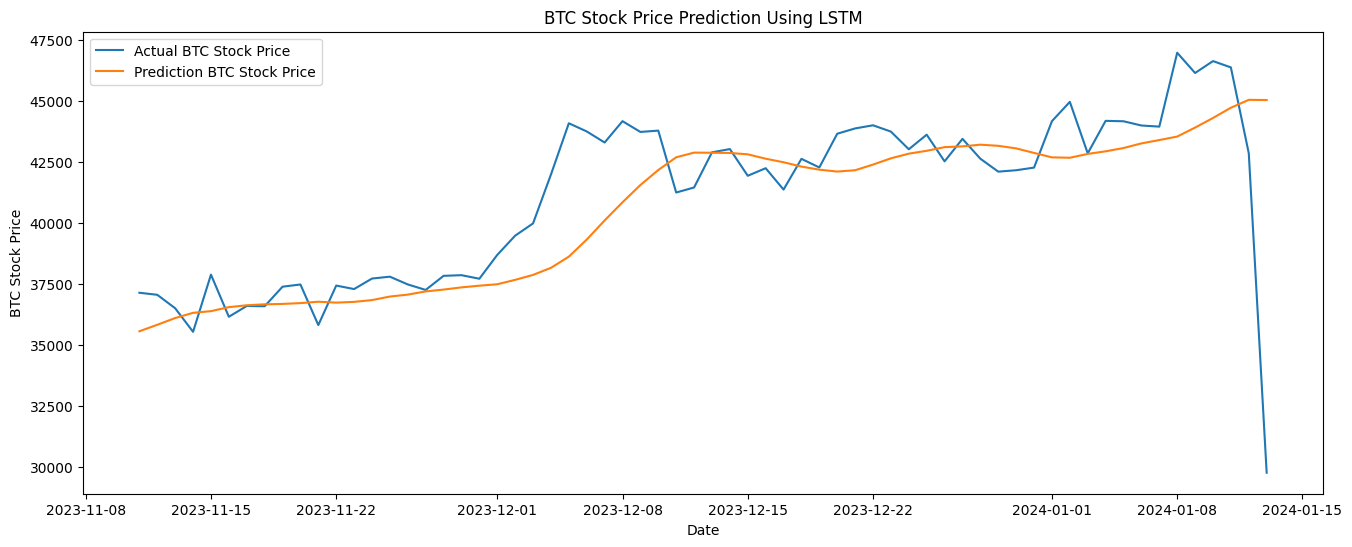

In [39]:
plt.figure(figsize=[16,6])
plt.plot(data.index[-len(predictions):],data[-len(predictions):]['Adj Close'],label="Actual BTC Stock Price")
plt.plot(data.index[-len(predictions):],predictions,label="Prediction BTC Stock Price")
plt.title("BTC Stock Price Prediction Using LSTM")
plt.xlabel("Date")
plt.ylabel("BTC Stock Price")
plt.legend()
plt.show()

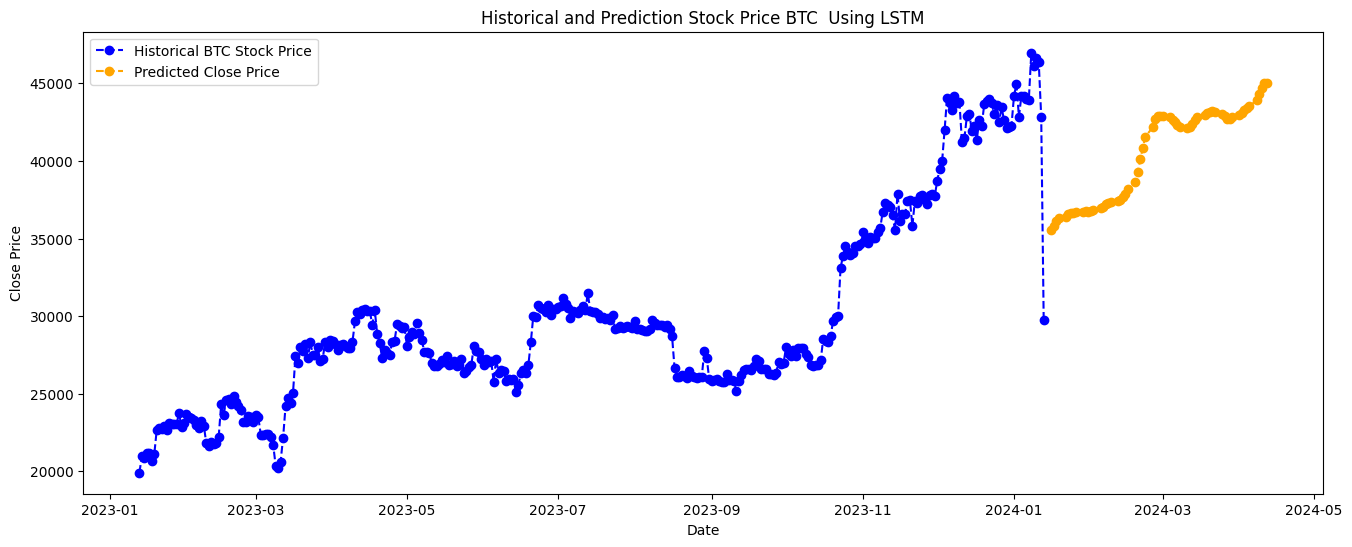

In [40]:
close_price_col ='Adj Close'
plt.figure(figsize=[16,6])
plt.plot(data.index,data[close_price_col],label="Historical BTC Stock Price",marker='o',linestyle='--',color='b')

predicted_date=pd.date_range(start=data.index[-1],periods=len(predictions)+1, freq='B')[1:]
plt.plot(predicted_date,predictions,label="Predicted Close Price",marker='o',linestyle='dashed',color='orange')

plt.title("Historical and Prediction Stock Price BTC  Using LSTM")
plt.xlabel("Date")
plt.ylabel("Close Price")
plt.legend()
plt.show()